In [1]:
#Libraries to be used
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000 #global variable; number of "partitions" for the interval [-2,2]

def function(x,y):
    """
    Takes in two numpy arrays that are result of meshgrid.
    Returns a numpy array with points representing the iteration number for divergence
    """
    max_iter = 100 #maximum number of interations
    c = x + 1j*y
    z = np.zeros((N,N),dtype=complex)
    r = np.zeros((N,N),dtype=int) #return
    mask = np.full((N,N), True, dtype=bool)
    for i in range(0,max_iter,1):
        z[mask] = z[mask]**2 + c[mask]  #z_i = z_i-1**2 + c
        r[mask] = i #i is the iteration number at which point escapes (diverges)
        #if point ever becomes larger than 2, the sequence will escape to infinity:
        mask[np.abs(z) > 2] = False #points that diverge
    return r, mask

In [3]:
#Function to plot
def plot_set(bounds,plot_binary):
    """
    Plots the Mandelbrot set with the given bounds
    INPUT:
    ::array:: bounds            #bounds of the plot
    ::boolean:: plot_binary     #whether or not to plot binary (for colour plot, send False)
    """
    x = np.linspace(bounds[0], bounds[1], N)
    y = np.linspace(bounds[2], bounds[3], N)
    xv, yv = np.meshgrid(x,y)
    vals, mandelbrot = function(xv, yv)
    vals = np.flip(vals,0) #flip array vertically
    mandelbrot = np.flip(mandelbrot,0)

    font = {'fontname':'Times New Roman'} 
    plt.figure(dpi=100)
    plt.title('Mandelbrot Set')
    plt.xticks(np.arange(0,N+1,N/4),np.arange(bounds[0],bounds[1]+1,(bounds[1]-bounds[0])/4)) #careful: arange works as [start, stop)
    plt.yticks(np.arange(0,N+1,N/4),np.arange(bounds[3],bounds[2]-1,(bounds[2]-bounds[3])/4))
    plt.xlabel('Re',**font)
    plt.ylabel('Im',**font)
    if plot_binary == False:
        plt.imshow(vals, cmap='plasma_r')
        cbar = plt.colorbar()
        cbar.set_label('Number of Iterations for Divergence')
    else:
        plt.imshow(mandelbrot, cmap=plt.cm.gray)
    plt.show()
    return True

In [4]:
#Incase of no convergence
def plot_set_alternate(bounds):
    """
    Similar to plot_set() but instead uses matplotlib.pyplot.contourf()
    """
    x = np.linspace(bounds[0], bounds[1], N)
    y = np.linspace(bounds[2], bounds[3], N)
  
    xv, yv = np.meshgrid(x,y)
    vals, mandelbrot = function(xv, yv)
    
    font = {'fontname':'Times New Roman'} 
    plt.figure(dpi=100)
    plt.title('Mandelbrot Set')
    plt.contourf(xv, yv, vals, levels=100, cmap='plasma_r')
    plt.xlabel('Re',**font)
    plt.ylabel('Im',**font)
    plt.axes().set_aspect('equal')
    plt.colorbar(label='Number of Iterations for Divergence')
    plt.show()

    return True

/tmp/ipykernel_92688/3210191624.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(label='Number of Iterations for Divergence')


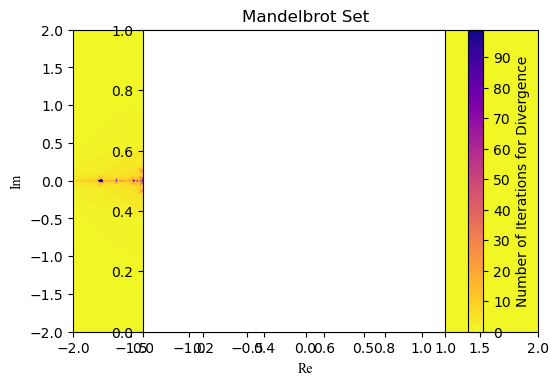

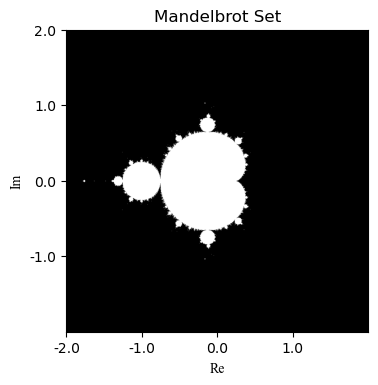

True

In [6]:
bounds1 = [-2,2,-2,2] #[xmin,xmax,ymin,ymax]
bounds2 = [-2,0,-1,1]
plot_set_alternate(bounds1)
plot_set(bounds1, True)
#plot_set(bounds2, True)